# Plots for comparing neighborhood of similarity of RNA velocity models

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scvelo as scv
import cellrank as cr

In [82]:
import matplotlib

Import for the NMP dataset

In [2]:
# Computed similarity within a method, also includes velocity signal computed for each 
nmp_within_df = pd.read_csv('nmp_dataset/within_self_cosineSim.csv')
nmp_within_df['dataset'] = 'nmp'

Import for the ZF 24hpf embryo

In [3]:
# Computed similarity within a method, also includes velocity signal computed for each 
zf24_within_df = pd.read_csv('zebrahub_24hrs_dataset/within_self_cosineSim.csv')
zf24_within_df['dataset'] = 'zf_embryo24'

Import for the pancreas dataset

In [4]:
# Computed similarity within a method, also includes velocity signal computed for each 
pancreas_within_df = pd.read_csv('pancreas_dataset/within_self_cosineSim.csv')
pancreas_within_df['dataset'] = 'pancreas'

## Import the anndata objects for the different methods and datasets

In [32]:
adata_nmp_deepvel = sc.read_h5ad('nmp_dataset/deepVelo_Jun22.h5ad')
adata_nmp_scvDet = sc.read_h5ad('nmp_dataset/scVelo_deterministic_Jun22.h5ad')
adata_nmp_scvDyn = sc.read_h5ad('nmp_dataset/scVelo_dynamical_Jun22.h5ad')
adata_nmp_scvSto = sc.read_h5ad('nmp_dataset/scVelo_stochastic_Jun22.h5ad')
adata_nmp_uniTVel = sc.read_h5ad('nmp_dataset/uniTVelo_Jun22.h5ad')

In [33]:
adata_zf_deepvel = sc.read_h5ad('zebrahub_24hrs_dataset/deepVelo_Jun22.h5ad')
adata_zf_Det = sc.read_h5ad('zebrahub_24hrs_dataset/scVelo_deterministic_Jun22.h5ad')
adata_zf_Dyn = sc.read_h5ad('zebrahub_24hrs_dataset/scVelo_dynamical_Jun22.h5ad')
adata_zf_Sto = sc.read_h5ad('zebrahub_24hrs_dataset/scVelo_stochastic_Jun22.h5ad')
adata_zf_UniT = sc.read_h5ad('zebrahub_24hrs_dataset/uniTVelo_Jun22.h5ad')

In [34]:
adata_pan_deepvel= sc.read_h5ad('pancreas_dataset/deepVelo_Jun22.h5ad')
adata_pan_Det = sc.read_h5ad('pancreas_dataset/scVelo_deterministic_Jun22.h5ad')
adata_pan_Dyn = sc.read_h5ad('pancreas_dataset/scVelo_dynamical_Jun22.h5ad')
adata_pan_Sto = sc.read_h5ad('pancreas_dataset/scVelo_stochastic_Jun22.h5ad')
adata_pan_UniT = sc.read_h5ad('pancreas_dataset/uniTVelo_Jun22.h5ad')

# Boxplots of neighborhood consistency distribution, across datasets

In [5]:
def individual_df_forBoxplot(df = pd.DataFrame, dropcols = [''], dataset = '', id_column=''):
    
    pivot_df = df.drop(dropcols, axis=1).copy()
    pivot_df = pivot_df.melt(id_vars=id_column, var_name='Method', value_name='Value')
    pivot_df['dataset'] = dataset
    
    return pivot_df
    

### Combine datasets together

In [8]:
nmp_within = individual_df_forBoxplot(nmp_within_df, ['clusters', 'deepVel_vel_selfTrans', 'deepVel_vel_length',
        'scvDet_vel_selfTrans', 'scvDet_vel_length',
       'scvDyn_vel_selfTrans', 'scvDyn_vel_length',
        'scvSto_vel_selfTrans', 'scvSto_vel_length',
        'uniTV_vel_selfTrans', 'uniTV_vel_length',
        'analysis_type', 'dataset'], 'nmp', 'cell_id')

In [10]:
nmp_within.head()

,cell_id,Method,Value,dataset
0,TDR18_AAACCCAAGGCGAAGG-1,deepVel_vel_confCos,0.130793,nmp
1,TDR18_AAAGGGCAGATGACAT-1,deepVel_vel_confCos,0.311806,nmp
2,TDR18_AAAGGGCAGGCCCAAA-1,deepVel_vel_confCos,0.395224,nmp
3,TDR18_AAAGGTAAGATACGAT-1,deepVel_vel_confCos,0.394131,nmp
4,TDR18_AAAGGTACAGTATTCG-1,deepVel_vel_confCos,0.306031,nmp


In [9]:
zf_within = individual_df_forBoxplot(zf24_within_df, ['clusters', 'seurat_clusters', 'timepoint',
       'zebrafish_anatomy_ontology_class', 'leiden', 'deepVel_vel_selfTrans',
       'deepVel_vel_length', 'scvDet_vel_selfTrans',
       'scvDet_vel_length',  'scvDyn_vel_selfTrans',
       'scvDyn_vel_length',  'scvSto_vel_selfTrans',
       'scvSto_vel_length', 'uniTV_vel_selfTrans',
       'uniTV_vel_length', 'analysis_type', 'dataset'], 'zf_embryo24', 'cell_id')

In [11]:
zf_within.head()

,cell_id,Method,Value,dataset
0,TDR43_AAACCCAGTTTGTGGT-1,deepVel_vel_confCos,0.087789,zf_embryo24
1,TDR46_AGTCAACAGCATATGA-1,deepVel_vel_confCos,0.515374,zf_embryo24
2,TDR44_TGTCCCAAGAGAATCT-1,deepVel_vel_confCos,0.850812,zf_embryo24
3,TDR44_TCTTCCTGTATACGGG-1,deepVel_vel_confCos,0.198985,zf_embryo24
4,TDR46_CATCAAGTCTGAACGT-1,deepVel_vel_confCos,0.590427,zf_embryo24


In [12]:
pancreas_within = individual_df_forBoxplot(pancreas_within_df, ['clusters', 'deepVel_vel_selfTrans', 'deepVel_vel_length',
        'scvDet_vel_selfTrans', 'scvDet_vel_length',
        'scvDyn_vel_selfTrans', 'scvDyn_vel_length',
        'scvSto_vel_selfTrans', 'scvSto_vel_length',
        'uniTV_vel_selfTrans', 'uniTV_vel_length',
        'analysis_type', 'dataset'], 'pancreas', 'index')

In [13]:
pancreas_within.head()

,index,Method,Value,dataset
0,AAACCTGAGAGGGATA,deepVel_vel_confCos,0.590843,pancreas
1,AAACCTGAGCCTTGAT,deepVel_vel_confCos,0.767263,pancreas
2,AAACCTGAGGCAATTA,deepVel_vel_confCos,0.443095,pancreas
3,AAACCTGCATCATCCC,deepVel_vel_confCos,0.585572,pancreas
4,AAACCTGGTAAGTGGC,deepVel_vel_confCos,0.477021,pancreas


In [14]:
pancreas_within = pancreas_within.rename(columns={'index': 'cell_id'})

In [16]:
all_within = pd.concat([zf_within, pancreas_within, nmp_within])
all_within.head()

,cell_id,Method,Value,dataset
0,TDR43_AAACCCAGTTTGTGGT-1,deepVel_vel_confCos,0.087789,zf_embryo24
1,TDR46_AGTCAACAGCATATGA-1,deepVel_vel_confCos,0.515374,zf_embryo24
2,TDR44_TGTCCCAAGAGAATCT-1,deepVel_vel_confCos,0.850812,zf_embryo24
3,TDR44_TCTTCCTGTATACGGG-1,deepVel_vel_confCos,0.198985,zf_embryo24
4,TDR46_CATCAAGTCTGAACGT-1,deepVel_vel_confCos,0.590427,zf_embryo24


In [17]:
all_within.groupby(['Method', 'dataset'])['Value'].median().groupby(['Method']).median()

Method
deepVel_vel_confCos    0.457843
scvDet_vel_confCos     0.501856
scvDyn_vel_confCos     0.367463
scvSto_vel_confCos     0.568869
uniTV_vel_confCos      0.952309
Name: Value, dtype: float64

In [20]:
replacements = {'scvDyn_vel_confCos': 'Dynamic', 'deepVel_vel_confCos':'DeepVelo', 
                'scvDet_vel_confCos':'Velocyto', 'scvSto_vel_confCos':'Stochastic','uniTV_vel_confCos':'UniTVelo'}


# Apply the replacements using .map()
all_within['Method'] = all_within['Method'].map(replacements)

In [22]:
datasets = {'zf_embryo24': 'ZF Full Embryo 24hpf', 'pancreas': 'Pancreas', 'nmp': 'ZF NMP'}
all_within['dataset'] = all_within['dataset'].map(datasets)

In [26]:
all_within.dataset.unique()

array(['ZF Full Embryo 24hpf', 'Pancreas', 'ZF NMP'], dtype=object)

## Plot consistency across datasets for each method

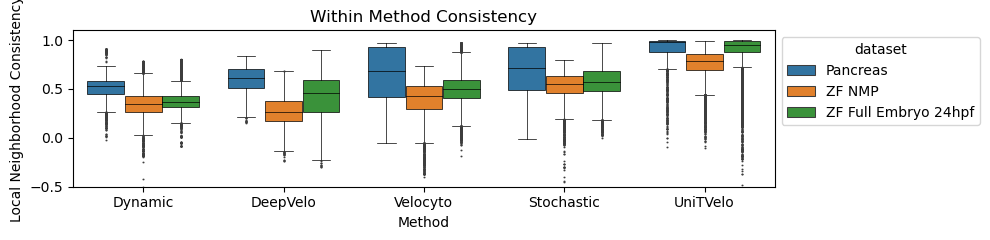

In [68]:
# Create the boxplot

plt.rcParams['font.size'] = 10

plt.figure(figsize=(10, 2.5))  # Adjust the figure size as per your requirements
ax = sns.boxplot(x='Method', y='Value', 
               hue='dataset',
                hue_order=['Pancreas', 'ZF NMP', 'ZF Full Embryo 24hpf'],
               data=all_within, #inner='box',  
                  order=['Dynamic', 'DeepVelo', 'Velocyto',
               'Stochastic', 'UniTVelo'],
                 boxprops=dict(edgecolor="black", linewidth=0.5),
                 whiskerprops=dict(color="black", linewidth=0.5),
                 capprops=dict(color="black", linewidth=0.5),
                 medianprops=dict(color="black", linewidth=0.5), 
                 flierprops = dict(markerfacecolor='black', markersize=0.5,
                                   linestyle='none'))
# Add labels and title
#plt.legend()
plt.ylim(-0.5, 1.1)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Method')
plt.ylabel('Local Neighborhood Consistency')
plt.title('Within Method Consistency')

# Show the plot

plt.gcf().set_size_inches(10, 2.5)

plt.tight_layout()
# plt.savefig('datasets_within_methodcomparison.pdf', format='pdf')

plt.show()


# Distribution of sc-neighborhood agreement across cell types for different methods. 

In [42]:
methods_palette = {'DeepVelo': '#0072B5', 
                   
                'Dynamic': '#E18727', 
                   'Velocyto': '#00966C',
                  'Stochastic':'#CF5073',
                  'UniTVelo': '#4D4398'}

## Prepare dataframe, choose the top 3 and bottom 3 leiden clusters (by overall average neighborhood consistency)

Functions to create dataframe.

In [40]:
def metric1_DF(df, celltypecol, adata):
    
    mydf = df[[
       'deepVel_vel_confCos', 
       'scvDet_vel_confCos', 
       'scvDyn_vel_confCos', 
       'scvSto_vel_confCos', 
       'uniTV_vel_confCos']].rename(columns={'deepVel_vel_confCos': 'DeepVelo', 
                                             'scvDet_vel_confCos': 'Velocyto', 'scvDyn_vel_confCos': 'Dynamic', 
                                             'scvSto_vel_confCos': 'Stochastic', 'uniTV_vel_confCos':'UniTVelo' 
                                            })
    
    col = adata.obs[celltypecol].tolist()
    
    mydf['cell_type'] = col
    
    return mydf
    

In [43]:
def get_melted_df_celltype(df_self = pd.DataFrame):

    df = df_self.melt(id_vars='cell_type', var_name='method', value_name='value')
    
    
    return df
    
    

In [50]:
def find_top_bottom_clusters(df):
    # Calculate the median value for each cell_type across all methods
    grouped_median = df.groupby('cell_type')['value'].median().reset_index()

    # Sort the cell types by median value in ascending order
    sorted_median = grouped_median.sort_values(by='value', ascending=True)

    # Get all the cell types ordered by median value (smallest to largest)
    all_cell_types = sorted_median['cell_type'].tolist()

    # Take the first 3 and the last 3 cell types from the ordered list
    top_cell_types = all_cell_types[:3]
    bottom_cell_types = all_cell_types[-3:]

    # Combine the top and bottom unique cell types
    top_and_bottom_cell_types = top_cell_types + bottom_cell_types

    return top_and_bottom_cell_types


In [54]:
def top_bot_celltypes_DF(df_ct = pd.DataFrame):
    
    melt_df = get_melted_df_celltype(df_ct)
    
    celltypelist = find_top_bottom_clusters(melt_df)
    
    mydf = df_ct[df_ct['cell_type'].isin(celltypelist)]
    
    return mydf

## Create boxplots of neighborhood similarity for each velocity method, for top/bottom 3 cell types

ZF embryo 24hpf ---> takes in cell-cell (neighborhood similarity DF) and adata object

In [70]:
zf24_within_with_leiden = metric1_DF(zf24_within_df, 'clusters', adata_zf_deepvel)
zf24_within_with_leiden

,DeepVelo,Velocyto,Dynamic,Stochastic,UniTVelo,cell_type
0,0.087789,0.493528,0.402007,0.493780,0.995659,6
1,0.515374,0.544704,0.379665,0.572680,0.907741,0
2,0.850812,0.776917,0.430970,0.792237,0.866444,2
3,0.198985,0.235008,0.340754,0.284512,0.328894,1
4,0.590427,0.582076,0.471069,0.635082,0.941783,0
...,...,...,...,...,...,...
12909,0.403798,0.448046,0.307389,0.557219,0.992318,7
12910,0.230702,0.277710,0.301899,0.383111,0.252063,1
12911,0.331246,0.614656,0.473530,0.762451,0.975963,11
12912,0.499055,0.435443,0.334198,0.499605,0.943334,0


In [72]:
celltype_df_zf24 = top_bot_celltypes_DF(zf24_within_with_leiden)
celltype_df_zf24['cell_type'].unique()

array(['1', '8', '13', '9', '20', '18'], dtype=object)

In [73]:
#choose the celltype that is most prominent in the leiden cluster
zf_emb_leidentotype = {'1': 'neuron', '9':'otic_vesicle', '8':'primitive_heart_tube', 
                       '13': 'head_mesenchyme', '18': 'periderm', '20': 'hatching_gland_cell'}

In [106]:
zf_celltype = celltype_df_zf24.replace({"cell_type": zf_emb_leidentotype}).copy()

## Boxplot of top/bottom 3 cell types

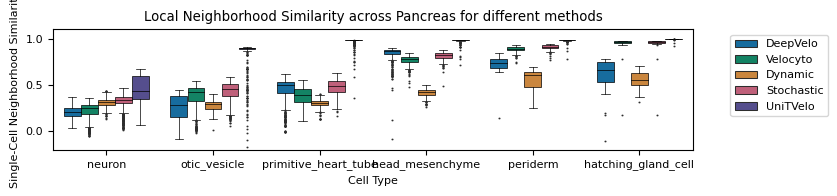

In [107]:
df = zf_celltype.melt(id_vars='cell_type', var_name='method', value_name='value')


plt.figure(figsize=(15, 4))
plt.rcParams['font.size'] = 8


avg_values = df.groupby('cell_type').mean()
avg_values = avg_values.mean(axis=1)

# Sort cell types based on average values
sorted_cell_types = avg_values.sort_values().index

# Reorder the DataFrame based on sorted cell types
df_sorted = df.set_index('cell_type').loc[sorted_cell_types].reset_index()


sns.boxplot(data=df_sorted, x='cell_type', y='value', hue='method', palette = methods_palette, 
            
                boxprops=dict(edgecolor="black", linewidth=0.5),
                 whiskerprops=dict(color="black", linewidth=0.5),
                 capprops=dict(color="black", linewidth=0.5),
                 medianprops=dict(color="black", linewidth=0.5), 
                 flierprops = dict(markerfacecolor='black', markersize=0.5,
                                   linestyle='none'))

plt.ylim(-0.2, 1.1)
plt.xlabel('Cell Type')
plt.ylabel('Single-Cell Neighborhood Similarity')
plt.title('Local Neighborhood Similarity across Pancreas for different methods')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot

plt.gcf().set_size_inches(8.5, 2)
    
plt.tight_layout()
#plt.savefig('figures/same_range_metric1/boxplot_top_celltypes_ZF24embryo_Aug28.pdf', format='pdf')

plt.show()




Dictionaries of cluster mapping to cell type for ZF NMP dataset and Pancreas.

In [2290]:
nmp_dict = {'21': 'LateralPlate', '4': 'Somites', '11': 'PSM', '17': 'Endoderm', '2': 'Hindbrain_1', '5': 'Hindbrain_2'}

In [2291]:
nmp_test_replace = nmp_test.replace({"cell_type": nmp_dict}).copy()

In [2339]:
adata_pan_deepvel[adata_pan_deepvel.obs['leiden'] == '8'].obs['clusters'].value_counts()

Ductal         164
Ngn3 low EP     33
Name: clusters, dtype: int64

In [2340]:
pan_dict = {'0': 'Ductal_1', '9': 'Alpha', '3': 'Ductal_2', '7': 'Beta_1', '5': 'Beta_2', '8': 'Ductal_3'}

In [2341]:
pan_test_replace = pan_test_leiden.replace({"cell_type": pan_dict}).copy()

## UMAPs colored by neighborhood consistency (and average across methods)

In [108]:
def plot_velocity_embedding_streams(adata, column_list, dataset, dpi=150):
    # Number of panels based on the number of adata objects
    n_cols = len(column_list)
    fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, 5), sharex=True, sharey=True, dpi=dpi)

    for i, col in enumerate(column_list):
        ax = axes[i]
        sc.pl.umap(
            adata,
            color=col,
            ax=ax, # Use the predefined axis
            color_map='spring',
            show=False,      # Prevent showing the plot immediately
            legend_fontsize=9,
            vmin= 0, vmax=1
        )
        ax.set_title('Median Cossim UMAP ' +col)  # Optionally set titles

        # Rasterizing the content inside each subplot
        for child in ax.get_children():
            if isinstance(child, matplotlib.collections.Collection):
                child.set_rasterized(True)

    plt.tight_layout()
    return fig, axes

In [78]:
column_list = ['Dynamic', 'DeepVelo', 'Velocyto',
               'Stochastic', 'UniTVelo']

In [101]:
zf24_metric1 = metric1_DF(zf24_within_df, 'clusters', adata_zf_deepvel)

In [80]:
adata = adata_zf_deepvel.copy()
dataframe_within = zf24_metric1.copy()
adata.obs['DeepVelo'] = dataframe_within['DeepVelo'].tolist()
adata.obs['Velocyto'] = dataframe_within['Velocyto'].tolist()
adata.obs['Dynamic'] = dataframe_within['Dynamic'].tolist()
adata.obs['Stochastic'] = dataframe_within['Stochastic'].tolist()
adata.obs['UniTVelo'] = dataframe_within['UniTVelo'].tolist()


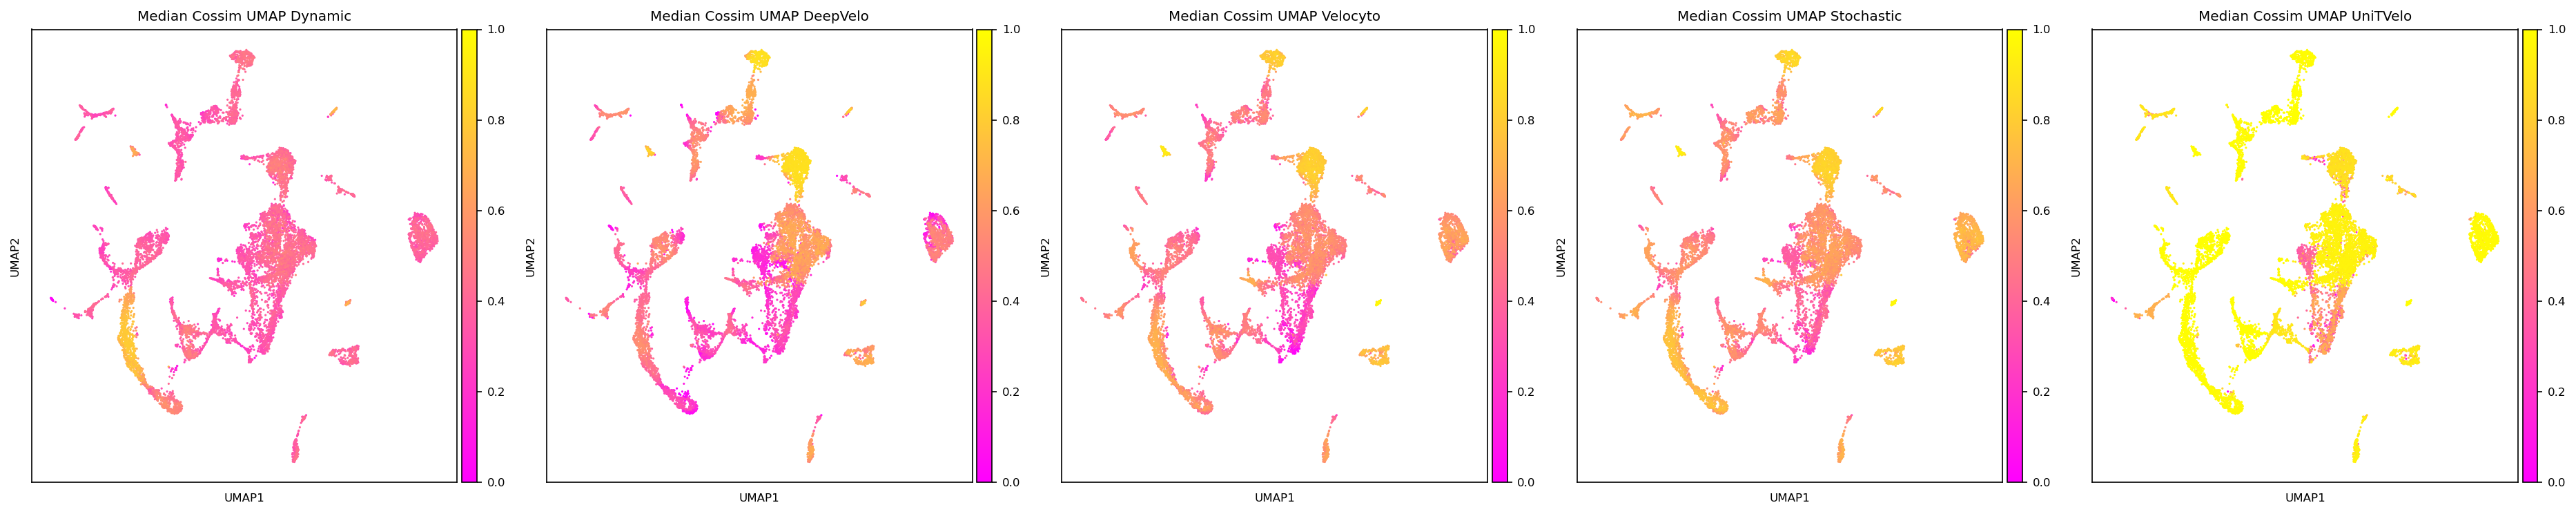

In [85]:
fig, axes = plot_velocity_embedding_streams(adata, column_list, 'ZF embryo 24hpf')
#fig.savefig(save_path + 'spring_zfembryo24hpf_localconsistency_May22.pdf', dpi=500)
fig

### Compute average neighborhood consistency across all methods for each dataset

In [102]:
nmp_metric1avg = nmp_within_df[[
       'deepVel_vel_confCos', 
       'scvDet_vel_confCos', 
       'scvDyn_vel_confCos', 
       'scvSto_vel_confCos', 
       'uniTV_vel_confCos']].rename(columns={'deepVel_vel_confCos': 'DeepVelo', 
                                             'scvDet_vel_confCos': 'Velocyto', 'scvDyn_vel_confCos': 'Dynamic', 
                                             'scvSto_vel_confCos': 'Stochastic', 'uniTV_vel_confCos':'UniTVelo' 
                                            }).mean(axis=1)

In [103]:
zf_metric1avg = zf24_within_df[[
       'deepVel_vel_confCos', 
       'scvDet_vel_confCos', 
       'scvDyn_vel_confCos', 
       'scvSto_vel_confCos', 
       'uniTV_vel_confCos']].rename(columns={'deepVel_vel_confCos': 'DeepVelo', 
                                             'scvDet_vel_confCos': 'Velocyto', 'scvDyn_vel_confCos': 'Dynamic', 
                                             'scvSto_vel_confCos': 'Stochastic', 'uniTV_vel_confCos':'UniTVelo' 
                                            }).mean(axis=1)

In [104]:
pan_metric1avg = pancreas_within_df[[
       'deepVel_vel_confCos', 
       'scvDet_vel_confCos', 
       'scvDyn_vel_confCos', 
       'scvSto_vel_confCos', 
       'uniTV_vel_confCos']].rename(columns={'deepVel_vel_confCos': 'DeepVelo', 
                                             'scvDet_vel_confCos': 'Velocyto', 'scvDyn_vel_confCos': 'Dynamic', 
                                             'scvSto_vel_confCos': 'Stochastic', 'uniTV_vel_confCos':'UniTVelo' 
                                            }).mean(axis=1)

In [99]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

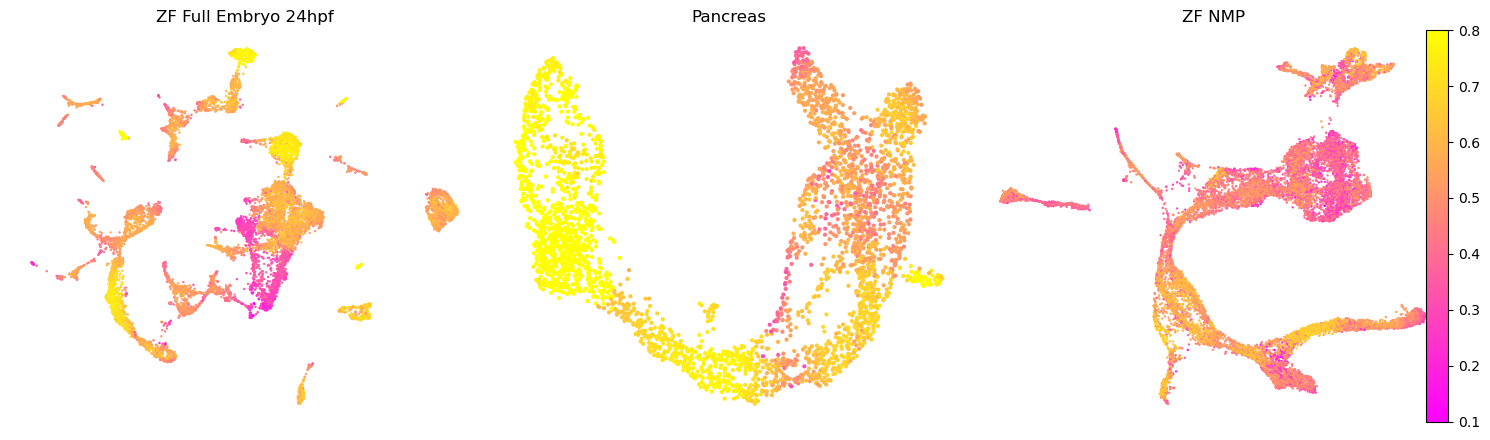

In [109]:
#3 umaps, 3 different color palettes for each method. All NMP umaps, with color gradient as neighborhood agreement.
#plt.figure(figsize=(4, 1.5))

#plt.rcParams['font.family'] = myfont.get_name()
    
fig, axs = plt.subplots(1, 3, figsize=(15, 4.5))

plt.rcParams['font.size'] = 10

# UMAP plots with different color parameters
scatter1 = axs[0].scatter(x=adata_zf_deepvel.obsm['X_umap'][:,0], y=adata_zf_deepvel.obsm['X_umap'][:,1], c=zf_metric1avg, s=0.5, cmap = 'spring', vmin= 0.1, vmax=0.8)
scatter2 = axs[1].scatter(x=adata_pan_deepvel.obsm['X_umap'][:,0], y=adata_pan_deepvel.obsm['X_umap'][:,1], c=pan_metric1avg, s=4, cmap = 'spring', vmin= 0.1, vmax=0.8)
scatter3 = axs[2].scatter(x=adata_deepvel.obsm['X_umap'][:,0], y=adata_deepvel.obsm['X_umap'][:,1], c=nmp_metric1avg, s=0.5, cmap = 'spring', vmin= 0.1, vmax=0.8)

for i in range(3):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].spines['left'].set_visible(False)

# Set titles for each subplot
axs[0].set_title("ZF Full Embryo 24hpf")
axs[1].set_title("Pancreas")
axs[2].set_title("ZF NMP")

divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(scatter3, cax=cax)

for child in axs[0].get_children():
            if isinstance(child, matplotlib.collections.Collection):
                child.set_rasterized(True)
        
for child in axs[1].get_children():
            if isinstance(child, matplotlib.collections.Collection):
                child.set_rasterized(True)
                
for child in axs[2].get_children():
            if isinstance(child, matplotlib.collections.Collection):
                child.set_rasterized(True)

# Position colorbar outside of subplots
divider = make_axes_locatable(axs[2])


plt.tight_layout()


axs, fig

#fig.savefig(save_path + 'spring_neighborhood_consistency_average_alldatasets_May29.pdf', dpi=500)

fig